In [20]:
pip install scikit-learn==1.7.1

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import os

for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [22]:
df = pd.read_csv("/input/resume-dataset/UpdatedResumeDataSet.csv")
df.sample(10)

,Category,Resume
907,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
818,ETL Developer,Computer skills: - Yes. SQL knowledge-yes Unix...
136,Arts,"Additional qualifications April 2000, Web Desi..."
934,Testing,â¢ Good logical and analytical skills â¢ Pos...
278,Health and fitness,Education Details \r\nJanuary 2018 M.S. Nutrit...
920,Testing,â¢ Good logical and analytical skills â¢ Pos...
499,Electrical Engineering,Education Details \r\nJuly 2016 to May 2019 BE...
565,Python Developer,TECHNICAL PROFICIENCIES Platform: Ubuntu/Fedor...
471,Automation Testing,"SKILLS Agile Methodology Scrum, Kanban, Extrem..."
526,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...


In [23]:
df.shape

(962, 2)

In [24]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

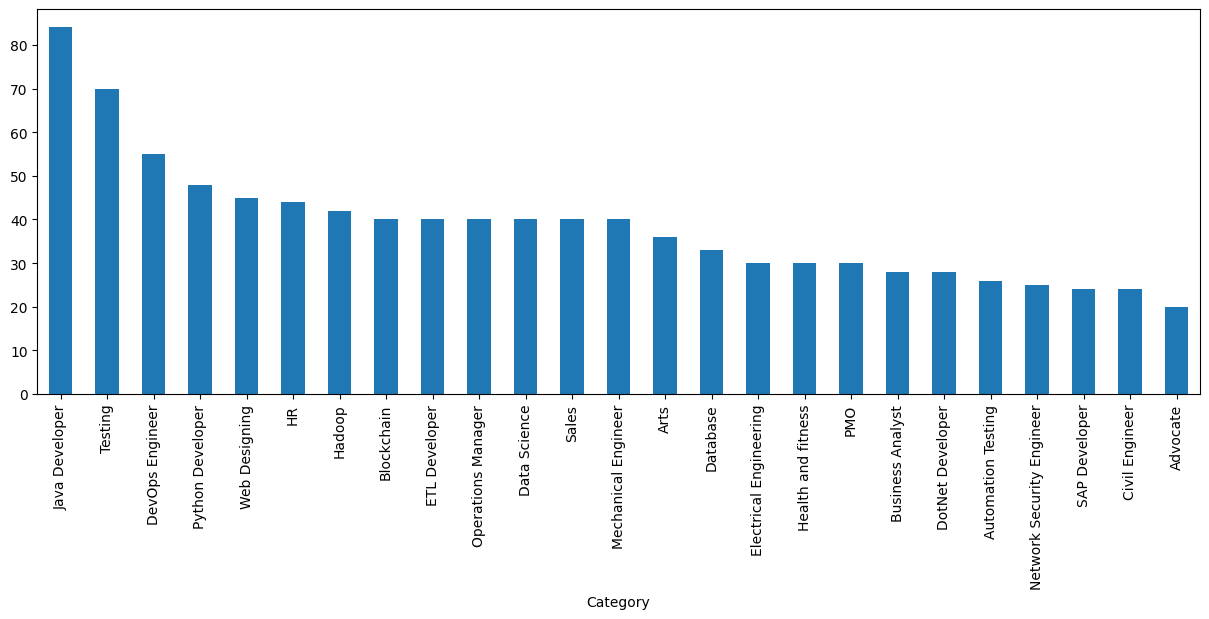

In [25]:
plt.figure(figsize=(15,5))
df["Category"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

In [ ]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    return clean_text

In [ ]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [29]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [30]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [31]:
le = LabelEncoder()
le.fit(df["Category"])
df["Category"] = le.transform(df["Category"])

In [32]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [33]:
tfidf = TfidfVectorizer()
tfidf.fit(df["Resume"])
resume = tfidf.transform(df["Resume"])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)

In [35]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [36]:
X_train.shape, y_train.shape

((769, 8017), (769,))

In [37]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

Accuracy of the KNN classifier on test set: 0.98


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from joblib import dump

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')
    dump(model, f'{model_name}.joblib')

dump(tfidf, 'vectorizer.joblib')
dump(le, 'label_encoder.joblib')

Accuracy of KNeighborsClassifier on test set: 0.98
Accuracy of LogisticRegression on test set: 0.99
Accuracy of RandomForestClassifier on test set: 0.99
Accuracy of SVC on test set: 0.99
Accuracy of MultinomialNB on test set: 0.98


['label_encoder.joblib']